# Usage for parse ground truth file and show
This is a demo for parse, visulize and split the data, the demo use the data in example folder,
but the folder does not neccessaryly include all the categories.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
from DOTA import DOTA
import dota_utils as util
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

In [2]:
example = DOTA('/data/hjm/dota_trainval/trainval_split')

In [3]:
imgids = example.getImgIds()
len(imgids)

21046

In [4]:
imgid=imgids[1800]
img = example.loadImgs(imgid)[0]

isarralike: False
imgids: ['P2673__1__0___0']
filename: /data/hjm/dota_trainval/trainval_split/images/P2673__1__0___0.png


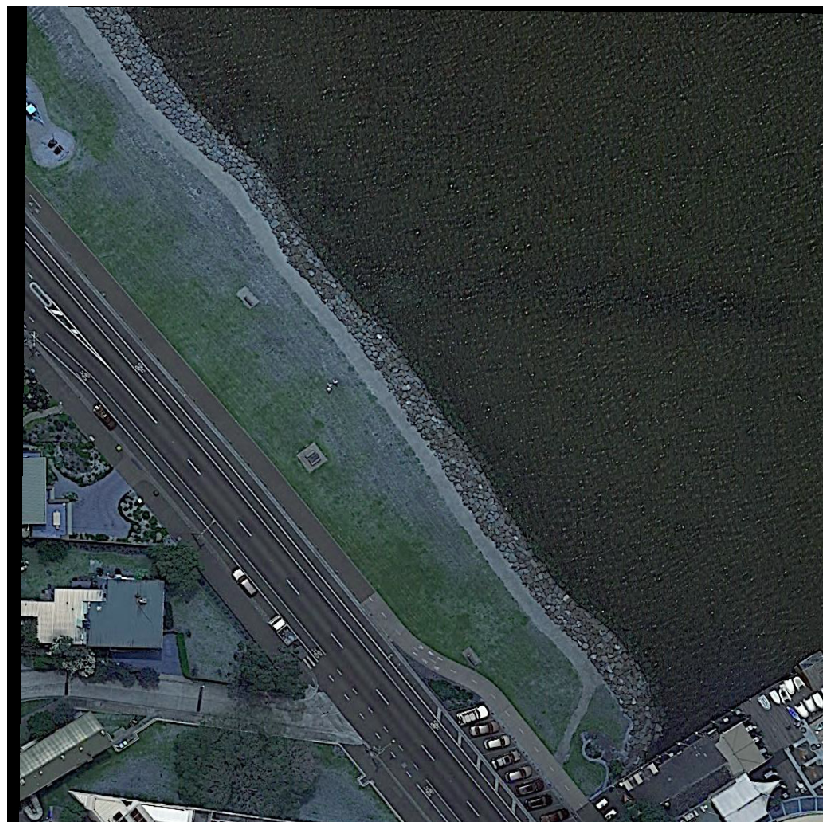

In [5]:
plt.figure(figsize=(15,15))
plt.axis('off')

plt.imshow(img)
plt.show()

In [8]:
import math
def cal_line_length(point1, point2):
    return math.sqrt( math.pow(point1[0] - point2[0], 2) + math.pow(point1[1] - point2[1], 2))
def get_best_begin_point_wrapp(coordinate):
    coordinate = np.array(coordinate).reshape(4, 2)
    output = get_best_begin_point(coordinate)
    output = np.array(output).reshape(8)
    return output
def get_best_begin_point(coordinate):
    x1 = coordinate[0][0]
    y1 = coordinate[0][1]
    x2 = coordinate[1][0]
    y2 = coordinate[1][1]
    x3 = coordinate[2][0]
    y3 = coordinate[2][1]
    x4 = coordinate[3][0]
    y4 = coordinate[3][1]
    xmin = min(x1, x2, x3, x4)
    ymin = min(y1, y2, y3, y4)
    xmax = max(x1, x2, x3, x4)
    ymax = max(y1, y2, y3, y4)
    combinate = [[[x1, y1], [x2, y2], [x3, y3], [x4, y4]], [[x2, y2], [x3, y3], [x4, y4], [x1, y1]],
                 [[x3, y3], [x4, y4], [x1, y1], [x2, y2]], [[x4, y4], [x1, y1], [x2, y2], [x3, y3]]]
    dst_coordinate = [[xmin, ymin], [xmax, ymin], [xmax, ymax], [xmin, ymax]]
    force = 100000000.0
    force_flag = 0
    for i in range(4):
        temp_force = cal_line_length(combinate[i][0], dst_coordinate[0]) + cal_line_length(combinate[i][1],
                                                                                           dst_coordinate[
                                                                                               1]) + cal_line_length(
            combinate[i][2], dst_coordinate[2]) + cal_line_length(combinate[i][3], dst_coordinate[3])
        if temp_force < force:
            force = temp_force
            force_flag = i
    if force_flag != 0:
        print("choose one direction!")
    return  combinate[force_flag]

In [9]:
plt.figure(figsize=(15,15))
anns = example.loadAnns(imgId=imgid)
anns_new = anns.copy()
for i,ann in enumerate(anns):
    poly = get_best_begin_point_wrapp(ann['poly'])
    anns_new[i]['poly'] = [(poly[i*2],poly[i*2+1]) for i in range(4)]

example.showAnns(anns_new, imgid, 2)

AttributeError: module 'numpy' has no attribute 'pow'

<Figure size 1080x1080 with 0 Axes>

## Split Image And Label
We provide the scale param before split the images and labels.
Sometimes, the instance is too large that it can be easily cut down(for example, ground track filed), in such case you need to set the param "rate" less than 1.

Before going on, first create folder to store the split data
```
  mkdir examplesplit
  mkdir examplesplit/images
  mkdir examplesplit/labelTxt
```
For test images, you only need to split images, refer to "SplitOnlyImage.py"

In [5]:
from ImgSplit import splitbase

In [6]:
split = splitbase(r'example', 
                 r'examplesplit', choosebestpoint=True)
split.splitdata(0.5)
split.splitdata(1)
split.splitdata(2)

In [7]:
examplesplit = DOTA('examplesplit')

In [8]:
imgids = examplesplit.getImgIds(catNms=['plane'])
imgid = imgids[1]
img = examplesplit.loadImgs(imgid)[0]

isarralike: False
imgids: ['P1088__2__1848___0']
filename: examplesplit/images/P1088__2__1848___0.png


isarralike: False
imgids: ['P1088__2__1848___0']
filename: examplesplit/images/P1088__2__1848___0.png


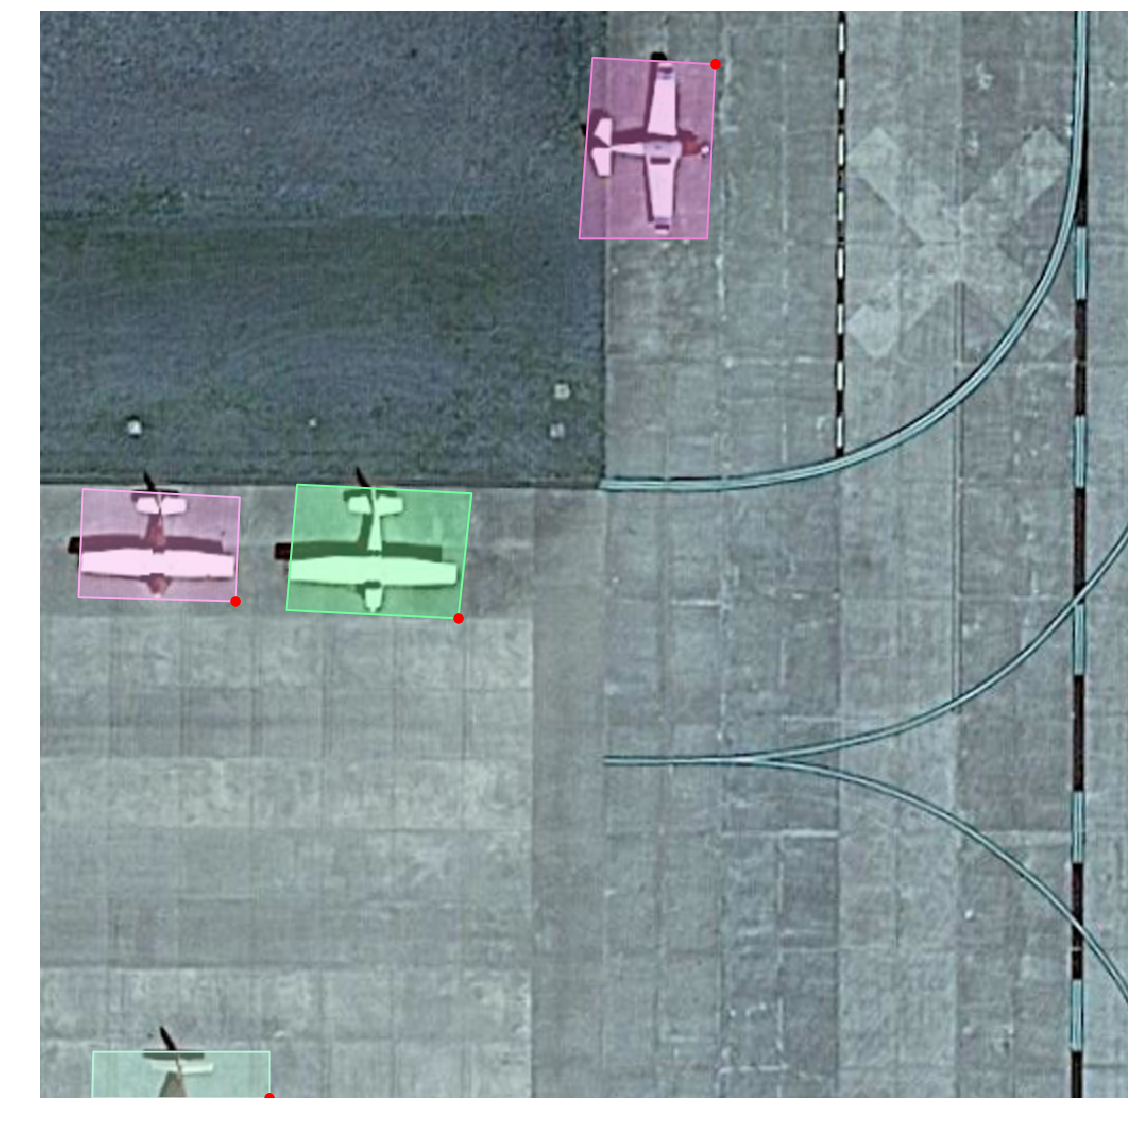

In [10]:
anns = examplesplit.loadAnns(imgId=imgid)
#print(anns)
examplesplit.showAnns(anns, imgid, 2)

## Merge patches
Now, we will merge these patches to see if they can be restored in the initial large images

In [11]:
from ResultMerge import mergebypoly

In [12]:
util.groundtruth2Task1(r'examplesplit/labelTxt',
                      r'Task1')
mergebypoly(r'Task1',
           r'Task1_merge')
util.Task2groundtruth_poly(r'Task1_merge',
                          r'restoredexample/labelTxt')

In [13]:
filepath = 'example/labelTxt'
imgids = util.GetFileFromThisRootDir(filepath)
imgids = [util.custombasename(x) for x in imgids]
print(imgids)

['P0770', 'P1234', 'P1088', 'P2709', 'P0706', 'P1888', 'P2598']


isarralike: False
imgids: ['P1088']
filename: example/images/P1088.png


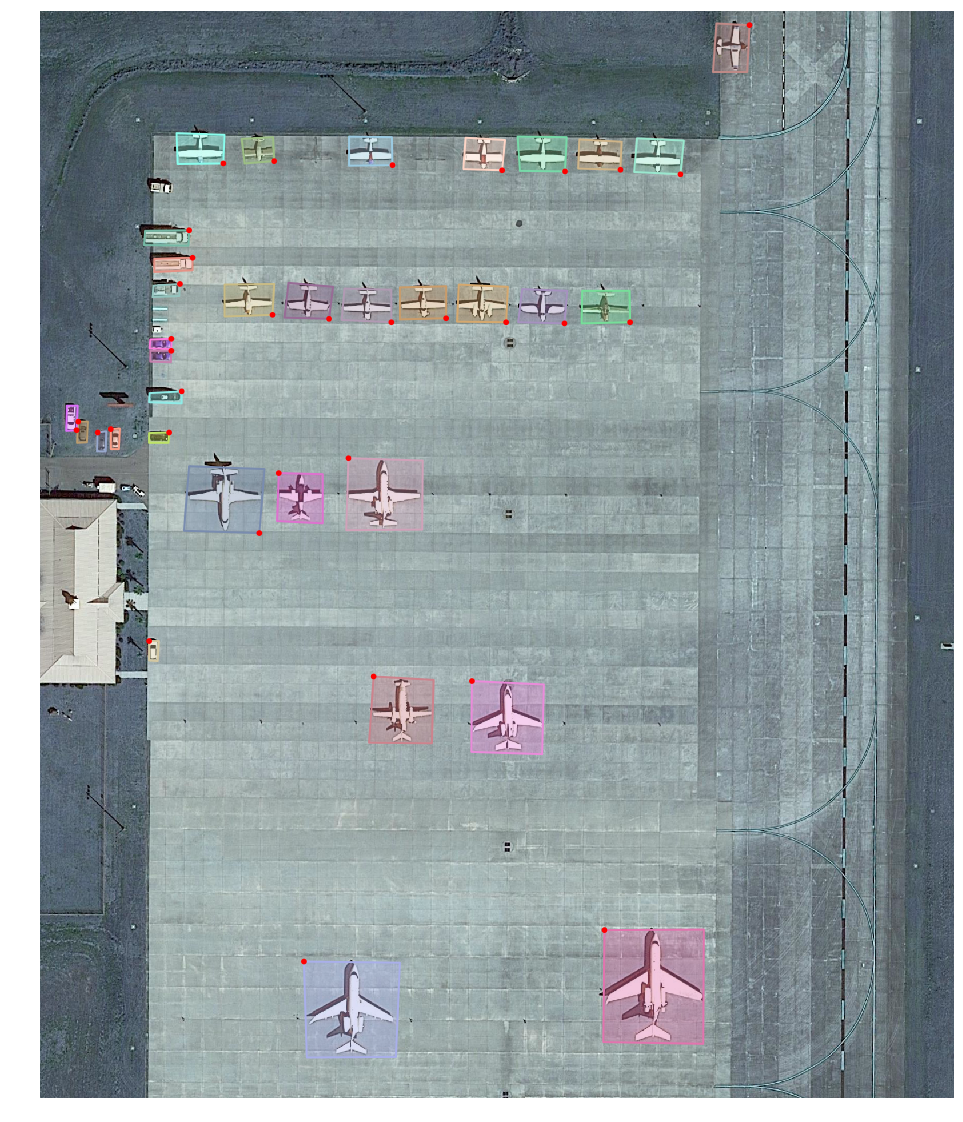

In [14]:
example = DOTA(r'example')
num = 2
anns = example.loadAnns(imgId=imgids[num])
# print(anns)
example.showAnns(anns, imgids[num], 2)

isarralike: False
imgids: ['P1088']
filename: restoredexample/images/P1088.png


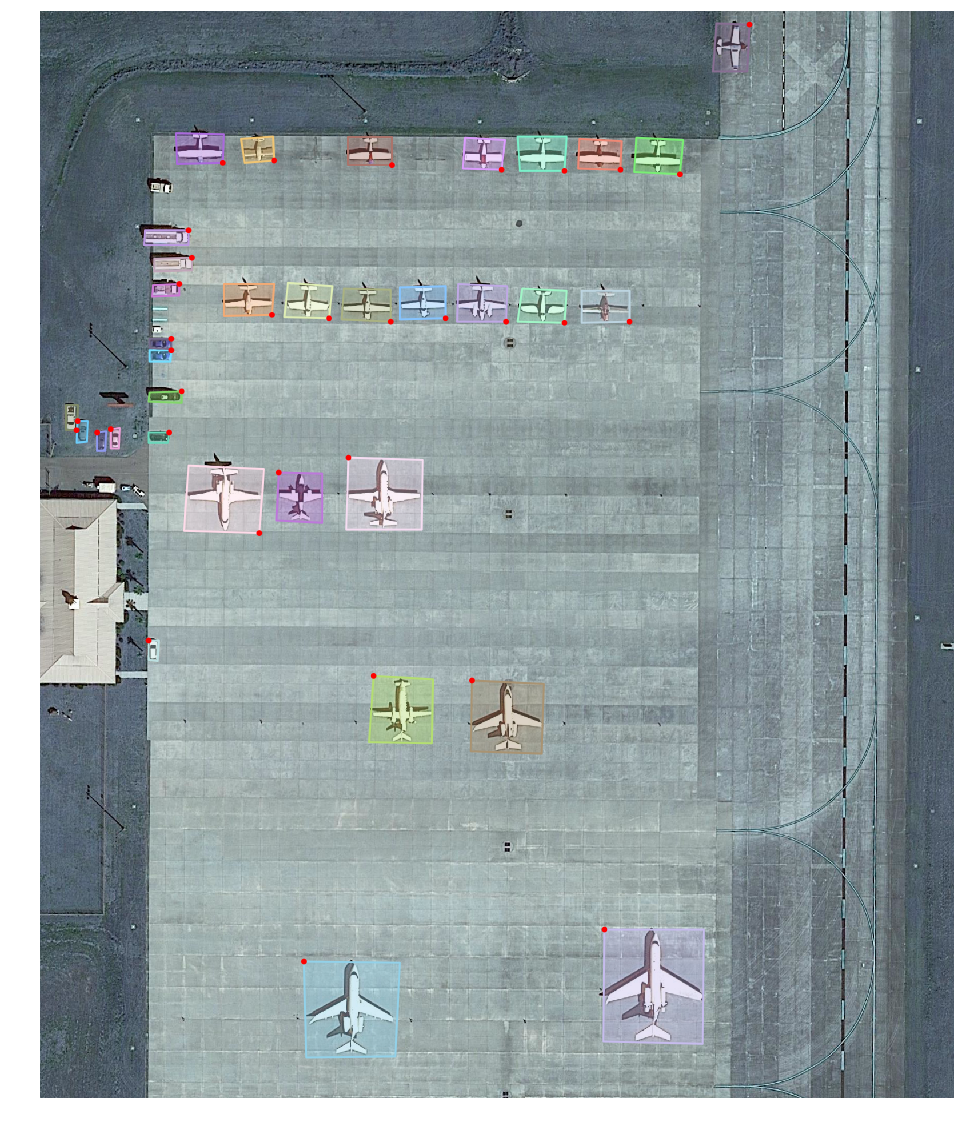

In [15]:
restored = DOTA(r'restoredexample')
num = 2
anns = restored.loadAnns(imgId=imgids[num])
# print(anns)
restored.showAnns(anns, imgids[num], 2)